============================= test session starts =============================
platform win32 -- Python 3.11.4, pytest-8.4.0, pluggy-1.6.0 -- c:\Users\dvcab\Desktop\BSC COMPUTING ARDEN\STU180792_ML_pipeline\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\dvcab\Desktop\BSC COMPUTING ARDEN\STU180792_ML_pipeline
collecting ... collected 16 items

tests/test_data_ingestion.py::test_data_is_dataframe PASSED              [  6%]
tests/test_data_ingestion.py::test_required_columns_exist PASSED         [ 12%]
tests/test_data_ingestion.py::test_no_full_column_nulls PASSED           [ 18%]
tests/test_data_ingestion.py::test_duplicate_rows PASSED                 [ 25%]
tests/test_data_ingestion.py::test_missing_dates_are_handled PASSED      [ 31%]
tests/test_feature_engineering.py::test_technical_indicators_exist PASSED [ 37%]
tests/test_feature_engineering.py::test_no_nan_in_indicators PASSED      [ 43%]
tests/test_feature_engineering.py::test_alignment_of_targets PASSED      

Dropdown(description='Select Test:', options=('run_all', 'run_data_ingestion', 'run_feature_engineering', 'run…

Button(description='Run Test', style=ButtonStyle())

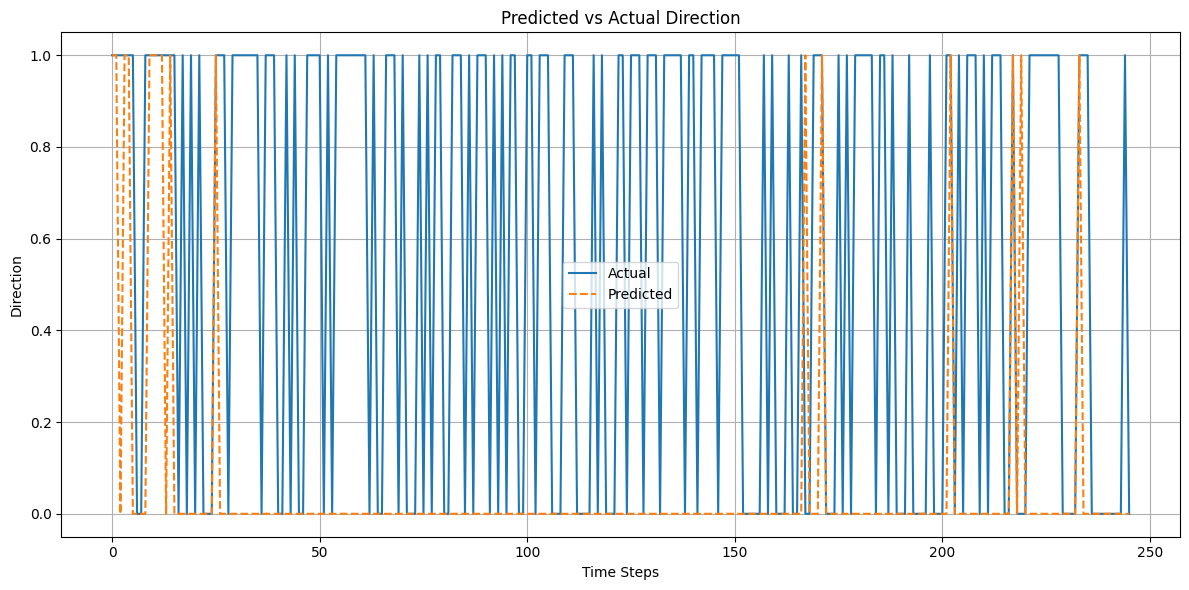

In [ ]:
# Import the test version 2 module containing test runners
import tests.test_version2 as tv2

# Import ipywidgets for creating interactive dropdown and buttons in Jupyter Notebook
import ipywidgets as widgets

# Import display function to render widgets in notebook
from IPython.display import display

# Add the current working directory to the system path so local imports can resolve
import os, sys
sys.path.insert(0, os.getcwd())

# Dynamically collect all test functions from test_version2 that start with 'run_'
# These are callable functions like run_all, run_pipeline_integration, etc.
test_funcs = {
    name: getattr(tv2, name)
    for name in dir(tv2)
    if name.startswith("run_") and callable(getattr(tv2, name))
}

# Create a dropdown widget populated with all test function names
dropdown = widgets.Dropdown(
    options=list(test_funcs.keys()),  # Dropdown options come from collected test functions
    description='Select Test:'        # Label for the dropdown
)

# Create a button labeled "Run Test"
button = widgets.Button(description="Run Test")

# Define what happens when the button is clicked
def on_button_clicked(b):
    selected_func = dropdown.value  # Get selected test function from dropdown
    print(f"Running: {selected_func}")  # Print the name of the function being run
    result = test_funcs[selected_func]()  # Execute the selected function
    if result == 0:
        print("Test Passed")  # Exit code 0 means success in pytest
    else:
        print("Test Failed")  # Any other code indicates a failure

# Attach the click event handler to the button
button.on_click(on_button_clicked)

# Display the dropdown and button widgets in the notebook
display(dropdown, button)
